<a href="https://colab.research.google.com/github/PranathPrasanth/Cat-and-Dog-Detection/blob/main/NPOL_internship.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
# Core libraries
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# TensorFlow & Keras
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing import image

# TensorFlow Datasets
import tensorflow_datasets as tfds

# Colab utilities (for uploading files)
from google.colab import files


In [30]:
# Load dataset
(ds_all,), ds_info = tfds.load(
    "cats_vs_dogs",
    split=["train"],
    with_info=True,
    as_supervised=True  # gives (image, label) pairs
)

# Train-test split (e.g., 80% train, 20% test)
train_size = int(0.8 * ds_info.splits["train"].num_examples)
test_size = ds_info.splits["train"].num_examples - train_size

ds_train = ds_all.take(train_size)
ds_test = ds_all.skip(train_size).take(test_size)

# Preprocessing function
def preprocess(image, label):
    image = tf.image.resize(image, (128, 128))
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

# Apply preprocessing + batching
ds_train = ds_train.map(preprocess).batch(32).shuffle(1000)
ds_test = ds_test.map(preprocess).batch(32)


In [31]:
#Build CNN Model
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')])  # binary classification

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [32]:
#Train model

history = model.fit(ds_train, epochs=5, validation_data=ds_test)

Epoch 1/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 55s 53ms/step - accuracy: 0.6145 - loss: 0.6517 - val_accuracy: 0.7357 - val_loss: 0.5232
Epoch 2/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 46s 51ms/step - accuracy: 0.7695 - loss: 0.4784 - val_accuracy: 0.8070 - val_loss: 0.4289
Epoch 3/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 81s 50ms/step - accuracy: 0.8256 - loss: 0.3831 - val_accuracy: 0.8124 - val_loss: 0.4135
Epoch 4/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 45s 48ms/step - accuracy: 0.8535 - loss: 0.3314 - val_accuracy: 0.8263 - val_loss: 0.4038
Epoch 5/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 84s 52ms/step - accuracy: 0.8924 - loss: 0.2453 - val_accuracy: 0.8446 - val_loss: 0.4089


Saving test_dog.jpeg to test_dog (1).jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


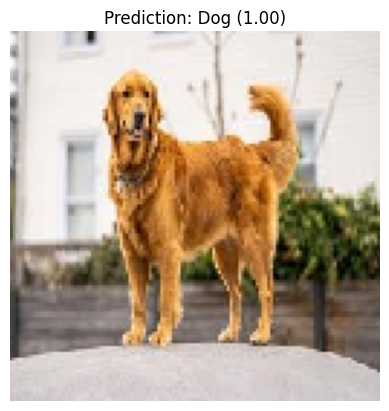

In [34]:
#Test model

uploaded = files.upload()

for filename in uploaded.keys():
    img_path = filename
    img = image.load_img(img_path, target_size=(128, 128))  # resize
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)  # add batch dimension

    prediction = model.predict(img_array)[0][0]
    predicted_class = "Dog" if prediction > 0.5 else "Cat"

    plt.imshow(img)
    plt.title(f"Prediction: {predicted_class} ({prediction:.2f})")
    plt.axis("off")
    plt.show()